33. The Autoregressive (AR) Model

In [1]:
# AR is a linear model, where current period values are a sum of past outcomes multiplied by a numeric factor
# Xt = C + phi * Xt-1 + Epsilon t 
# Xt-1 - the values of X during the previus period
# phi - w PL najczęściej Beta (parametr), any numeric constant by which we multiply the lagged variable 
# C - stała, constant benchmark
# Epsilon t - residual - the difference between out prediction for period "t" and the correct value (shock)

# AR(2) -> Xt = C + phi1 * Xt-1 + phi2 * Xt-2 + Epsilon t

# more lags -> more complicated model -> more coefficients to be interpreted -> more likely it is that some of them are not signif icant

Importing the relevant packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import seaborn as sns
sns.set()

Importing the data and pre-processing

In [3]:
raw_csv_data = pd.read_csv("/Users/ninalewandowska/Desktop/SGH/python_programming/TSA/Index2018.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace = True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method = 'ffill')

In [4]:
df_comp['market_value'] = df_comp.ftse

In [ ]:
# cutting data to a proportion 80/20. 80% - data frame on which we'll be working, 20% - test data frame

In [5]:
del df_comp['spx'], df_comp['dax'], df_comp['ftse'], df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [6]:
df_test.describe()

,market_value
count,1256.000000
mean,6759.037800
std,440.636830
min,5536.971555
25%,6462.086470
50%,6730.726775
75%,7027.238143
max,7778.637689


In [7]:
df.describe()

,market_value
count,5021.000000
mean,5089.640864
std,1017.110427
min,2876.600000
25%,4274.040000
50%,5266.060000
75%,5917.710000
max,6930.200000


34. Examining the ACF and PACF for Prices

The ACF

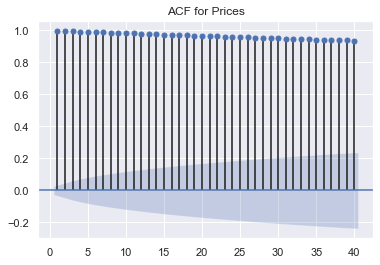

In [8]:
sgt.plot_acf(df.market_value, zero = False, lags = 40, title = "ACF for Prices")
plt.show()

The PACF

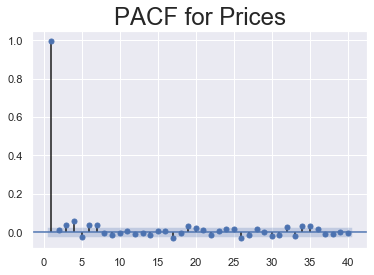

In [9]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False)
plt.title("PACF for Prices", size = 24)
plt.show()

35. Fitting an AR(1) Model for Index Prices

In [10]:
# we will be using statsmodels.tsa.arima_model library

The AR(1) Model

In [11]:
model_ar = ARMA(df.market_value, order = (1,0))

In [12]:
# we have to type what data we're using and what specific type of Autoregressive model we're testing on (order)
# "simple" autoregressive model = AR(1) - order = (1,0)
#     1 - the number of past values we wish to incorporate into the model
#     0 - not taking any of the residual values into consideration

In [13]:
results_ar = model_ar.fit()

In [14]:
# fitting the model = finding the most appropriate coefficients

In [15]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -27622.601
Method:                       css-mle   S.D. of innovations             59.258
Date:                Wed, 17 Jun 2020   AIC                          55251.202
Time:                        16:07:48   BIC                          55270.766
Sample:                    01-07-1994   HQIC                         55258.058
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5080.4874    485.036     10.474      0.000    4129.834    6031.141
ar.L1.market_value     0.9985      0.001   1296.972      0.000       0.997       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
-----------------------------------------------------------------------------
"""

In [16]:
# std err - measures how far away, in average, the model's predictions are from the true values
# z - the associated test-statistics for significance
# P>|z| - p-value (in this case it means that our coefficients are significantly greater from zero, thus they are significant)
# last two columns - critical values for the 95% confidence interval
#     if 0 is not a part of it, we can confirm the coefficients are significant

Higher-Lag AR Model

In [17]:
model_ar_2 = ARMA(df.market_value, order = (2,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -27621.866
Method:                       css-mle   S.D. of innovations             59.249
Date:                Wed, 17 Jun 2020   AIC                          55251.733
Time:                        16:07:56   BIC                          55277.818
Sample:                    01-07-1994   HQIC                         55260.873
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5056.7930    494.656     10.223      0.000    4087.286    6026.300
ar.L1.market_value     0.9814      0.014     69.595      0.000       0.954       1.009
ar.L2.market_value     0.0171      0.014      1.211      0.226      -0.011       0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
AR.2          -58.4620           +0.0000j           58.4620            0.5000
-----------------------------------------------------------------------------
"""

In [18]:
# we do not reject the null hypothesis - the coefficient of the second lag isn't significantly different from zero.
# therefor we can say that the prices from two days ago do not have significant impact on the prices today
# a possible explanation is that all the effects they have are captured in yesterday's price.
# thus adding additional information doesn't provide significant value

In [19]:
model_ar_3 = ARMA(df.market_value, order = (3,0))
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -27615.867
Method:                       css-mle   S.D. of innovations             59.178
Date:                Wed, 17 Jun 2020   AIC                          55241.733
Time:                        16:07:59   BIC                          55274.340
Sample:                    01-07-1994   HQIC                         55253.159
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5060.3714    519.095      9.748      0.000    4042.964    6077.779
ar.L1.market_value     0.9806      0.014     69.619      0.000       0.953       1.008
ar.L2.market_value    -0.0309      0.020     -1.563      0.118      -0.070       0.008
ar.L3.market_value     0.0489      0.014      3.466      0.001       0.021       0.077
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0013           -0.0000j            1.0013           -0.0000
AR.2           -0.1851           -4.5161j            4.5199           -0.2565
AR.3           -0.1851           +4.5161j            4.5199            0.2565
-----------------------------------------------------------------------------
"""

In [20]:
# Log-Likelihood -27621.866 -> -27615.867
# in the AR(3) the Log-Likelihood has increased comparing to the AR(2) model

In [21]:
model_ar_4 = ARMA(df.market_value, order = (4,0))
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -27602.565
Method:                       css-mle   S.D. of innovations             59.022
Date:                Wed, 17 Jun 2020   AIC                          55217.130
Time:                        16:08:01   BIC                          55256.258
Sample:                    01-07-1994   HQIC                         55230.841
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6412    559.947      9.090      0.000    3992.165    6187.118
ar.L1.market_value     0.9770      0.014     69.492      0.000       0.949       1.005
ar.L2.market_value    -0.0286      0.020     -1.455      0.146      -0.067       0.010
ar.L3.market_value    -0.0224      0.020     -1.135      0.256      -0.061       0.016
ar.L4.market_value     0.0728      0.014      5.166      0.000       0.045       0.100
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0011           -0.0000j            1.0011           -0.0000
AR.2            0.9550           -2.0884j            2.2964           -0.1817
AR.3            0.9550           +2.0884j            2.2964            0.1817
AR.4           -2.6036           -0.0000j            2.6036           -0.5000
-----------------------------------------------------------------------------
"""

LLR Test

In [22]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [23]:
# .llf - extracs the Log-Likelihood

Comparing Higher-Lag AR Models

In [24]:
LLR_test(results_ar_2, results_ar_3)

0.001

In [25]:
# the difference in the Log-Likelihood test is significant using 5% significance.
# therefor, we should opt for the more complicated model (ar_3)

In [26]:
LLR_test(results_ar_3, results_ar_4)

0.0

In [27]:
# same here
# we can be fitting a more complicated model and checking if it gives us distinguishably greater Log-Likelihood
# moreover, the model should also have its last lag not to be significantly different from 0

In [28]:
model_ar_4 = ARMA(df.market_value, order = (4,0))
results_ar_4 = model_ar_4.fit()
print (results_ar_4.summary())
print ("LLR test: " + str(LLR_test(results_ar_3, results_ar_4)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -27602.565
Method:                       css-mle   S.D. of innovations             59.022
Date:                Wed, 17 Jun 2020   AIC                          55217.130
Time:                        16:08:20   BIC                          55256.258
Sample:                    01-07-1994   HQIC                         55230.841
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6412    559.947      9.090      0.000    3992.165    6187.118
ar.L1.market_value     0.9770      0.014     69.492      0.000       0.949       1.005
ar.L2.market_value  

In [29]:
model_ar_5 = ARMA(df.market_value, order = (5,0))
results_ar_5 = model_ar_5.fit()
print (results_ar_5.summary())
print ("LLR test: " + str(LLR_test(results_ar_4, results_ar_5)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(5, 0)   Log Likelihood              -27600.348
Method:                       css-mle   S.D. of innovations             58.996
Date:                Wed, 17 Jun 2020   AIC                          55214.697
Time:                        16:08:23   BIC                          55260.346
Sample:                    01-07-1994   HQIC                         55230.693
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6412    543.609      9.363      0.000    4024.188    6155.094
ar.L1.market_value     0.9791      0.014     69.481      0.000       0.952       1.007
ar.L2.market_value  

In [37]:
model_ar_6 = ARMA(df.market_value, order = (6,0))
results_ar_6 = model_ar_6.fit()
print (results_ar_6.summary())
print ("LLR test: " + str(LLR_test(results_ar_5, results_ar_6)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(6, 0)   Log Likelihood              -27596.474
Method:                       css-mle   S.D. of innovations             58.950
Date:                Fri, 27 Mar 2020   AIC                          55208.947
Time:                        10:41:37   BIC                          55261.118
Sample:                    01-07-1994   HQIC                         55227.229
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6413    565.191      9.005      0.000    3981.888    6197.395
ar.L1.market_value     0.9803      0.014     69.604      0.000       0.953       1.008
ar.L2.market_value  

In [38]:
model_ar_7 = ARMA(df.market_value, order = (7,0))
results_ar_7 = model_ar_7.fit()
print (results_ar_7.summary())
print ("LLR test: " + str(LLR_test(results_ar_6, results_ar_7)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(7, 0)   Log Likelihood              -27591.900
Method:                       css-mle   S.D. of innovations             58.896
Date:                Fri, 27 Mar 2020   AIC                          55201.799
Time:                        10:41:59   BIC                          55260.492
Sample:                    01-07-1994   HQIC                         55222.366
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6412    589.587      8.633      0.000    3934.072    6245.210
ar.L1.market_value     0.9786      0.014     69.518      0.000       0.951       1.006
ar.L2.market_value  

In [39]:
model_ar_8 = ARMA(df.market_value, order = (8,0))
results_ar_8 = model_ar_8.fit()
print (results_ar_8.summary())
print ("LLR test: " + str(LLR_test(results_ar_7, results_ar_8)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(8, 0)   Log Likelihood              -27591.739
Method:                       css-mle   S.D. of innovations             58.894
Date:                Fri, 27 Mar 2020   AIC                          55203.478
Time:                        10:42:20   BIC                          55268.692
Sample:                    01-07-1994   HQIC                         55226.329
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6411    585.006      8.700      0.000    3943.050    6236.232
ar.L1.market_value     0.9790      0.014     69.476      0.000       0.951       1.007
ar.L2.market_value  

In [40]:
# finally - non-significant p-value for the LLR test and Non-significant p-value for the highest lag coefficients

In [42]:
print("LLR test: " + str(LLR_test(results_ar, results_ar_7, DF=6)))

LLR test: 0.0


In [ ]:
# we decide to stick with the AR(7) model

37. Using returns instead of prices

The DF Test

In [45]:
sts.adfuller(df.market_value)

(-1.9041551418836873,
 0.330108932770283,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54854.15304507557)

In [46]:
# p-value = 0.33 - so we can't say the data comes from a stationary process
# we can assume it is extracted from a non-stationary process
# we shouldn't rely on AR models to make accurate forecasts
# what can we do ???

# we can transform the data set, so that it fits the "stationary" assumptions
# -> using returns instead of prices (the % change between the values for two consecutive periods)

Using Returns

In [48]:
df['returns'] = df.market_value.pct_change(1).mul(100)
df = df.iloc[1:]

/Users/ninalewandowska/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# (1) - distance in time between the periods we want to compare
# we use mul(100) to multiply the results by 100, so that we have percentage points

In [49]:
sts.adfuller(df.returns)

(-12.7702657194972,
 7.79805833603984e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 15696.7672456975)

In [ ]:
# we can state that the data comes from a stationary process

38. Examining the ACF and PACF of Returns

ACF and PACF for Returns

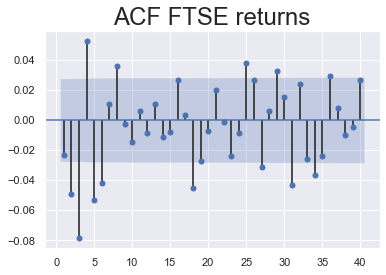

In [51]:
sgt.plot_acf(df.returns, lags = 40, zero = False)
plt.title("ACF FTSE returns", size = 24)
plt.show()

In [ ]:
# the first few values are both negative and positive, it means that the consecutive values move in different directions
# they are significant and they are some form of natural adjustment occuring in the market

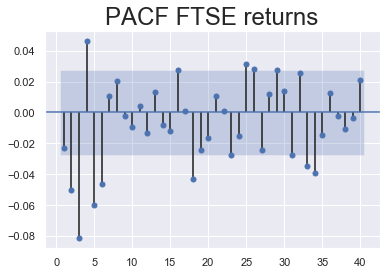

In [52]:
sgt.plot_pacf(df.returns, lags = 40, zero = False, method= ('ols'))
plt.title("PACF FTSE returns", size = 24)
plt.show()

39. Fitting the AR(1) Model for Index returns

AR(1) for Returns

In [53]:
model_ret_ar_1 = ARMA(df.returns, order = (1,0))

In [54]:
results_ret_ar_1 = model_ret_ar_1.fit()

In [55]:
results_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood               -7929.749
Method:                       css-mle   S.D. of innovations              1.174
Date:                Fri, 27 Mar 2020   AIC                          15865.497
Time:                        11:23:09   BIC                          15885.061
Sample:                    01-10-1994   HQIC                         15872.353
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.159      0.247      -0.013       0.051
ar.L1.returns    -0.0230      0.014     -1.631      0.103      -0.051       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.4386           +0.0000j           43.4386            0.5000
-----------------------------------------------------------------------------
"""

In [57]:
# this model holds no real predictive power (p > 0,05)

In [58]:
# the more easily yesterday's price is affected by higher lags, the more innacurate its coefficient becomes

40. Fitting Higher-Lag AR Models for Returns

Higher-Lag AR Models for Returns

In [59]:
model_ret_ar_2 = ARMA(df.returns, order = (2,0))
results_ret_ar_2 = model_ret_ar_2.fit()
results_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood               -7923.456
Method:                       css-mle   S.D. of innovations              1.173
Date:                Fri, 27 Mar 2020   AIC                          15854.911
Time:                        11:26:35   BIC                          15880.996
Sample:                    01-10-1994   HQIC                         15864.052
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.220      0.222      -0.011       0.049
ar.L1.returns    -0.0242      0.014     -1.716      0.086      -0.052       0.003
ar.L2.returns    -0.0500      0.014     -3.550      0.000      -0.078      -0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2417           -4.4635j            4.4701           -0.2586
AR.2           -0.2417           +4.4635j            4.4701            0.2586
-----------------------------------------------------------------------------
"""

In [60]:
# phi2 is significantly different from 0

In [62]:
LLR_test(results_ret_ar_1, results_ret_ar_2)

0.0

In [ ]:
# ICs are also lower

In [63]:
model_ret_ar_3 = ARMA(df.returns, order = (3,0))
results_ret_ar_3 = model_ret_ar_3.fit()
results_ret_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 0)   Log Likelihood               -7906.738
Method:                       css-mle   S.D. of innovations              1.169
Date:                Fri, 27 Mar 2020   AIC                          15823.477
Time:                        11:28:06   BIC                          15856.083
Sample:                    01-10-1994   HQIC                         15834.902
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.330      0.184      -0.009       0.047
ar.L1.returns    -0.0283      0.014     -2.011      0.044      -0.056      -0.001
ar.L2.returns    -0.0521      0.014     -3.705      0.000      -0.080      -0.025
ar.L3.returns    -0.0815      0.014     -5.792      0.000      -0.109      -0.054
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9233           -2.0210j            2.2219           -0.1818
AR.2            0.9233           +2.0210j            2.2219            0.1818
AR.3           -2.4855           -0.0000j            2.4855           -0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
# all of the coefficients related to the past values are significant

In [64]:
LLR_test(results_ret_ar_2, results_ret_ar_3)

0.0

In [65]:
model_ret_ar_4 = ARMA(df.returns, order = (4,0))
results_ret_ar_4 = model_ret_ar_4.fit()
results_ret_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(4, 0)   Log Likelihood               -7901.330
Method:                       css-mle   S.D. of innovations              1.168
Date:                Fri, 27 Mar 2020   AIC                          15814.661
Time:                        11:29:06   BIC                          15853.788
Sample:                    01-10-1994   HQIC                         15828.371
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.267      0.205      -0.010       0.048
ar.L1.returns    -0.0245      0.014     -1.739      0.082      -0.052       0.003
ar.L2.returns    -0.0496      0.014     -3.531      0.000      -0.077      -0.022
ar.L3.returns    -0.0802      0.014     -5.701      0.000      -0.108      -0.053
ar.L4.returns     0.0464      0.014      3.291      0.001       0.019       0.074
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.8888           -0.0000j            1.8888           -0.5000
AR.2            0.3231           -1.9331j            1.9599           -0.2236
AR.3            0.3231           +1.9331j            1.9599            0.2236
AR.4            2.9701           -0.0000j            2.9701           -0.0000
-----------------------------------------------------------------------------
"""

In [66]:
LLR_test(results_ret_ar_3, results_ret_ar_4)

0.001

In [67]:
model_ret_ar_5 = ARMA(df.returns, order = (5,0))
results_ret_ar_5 = model_ret_ar_5.fit()
results_ret_ar_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 0)   Log Likelihood               -7892.390
Method:                       css-mle   S.D. of innovations              1.166
Date:                Fri, 27 Mar 2020   AIC                          15798.779
Time:                        11:29:35   BIC                          15844.428
Sample:                    01-10-1994   HQIC                         15814.775
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.348      0.178      -0.009       0.046
ar.L1.returns    -0.0217      0.014     -1.544      0.123      -0.049       0.006
ar.L2.returns    -0.0544      0.014     -3.865      0.000      -0.082      -0.027
ar.L3.returns    -0.0831      0.014     -5.914      0.000      -0.111      -0.056
ar.L4.returns     0.0449      0.014      3.190      0.001       0.017       0.073
ar.L5.returns    -0.0596      0.014     -4.232      0.000      -0.087      -0.032
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5481           -0.0000j            1.5481           -0.5000
AR.2           -0.2860           -1.7252j            1.7487           -0.2761
AR.3           -0.2860           +1.7252j            1.7487            0.2761
AR.4            1.4366           -1.2157j            1.8819           -0.1118
AR.5            1.4366           +1.2157j            1.8819            0.1118
-----------------------------------------------------------------------------
"""

In [68]:
LLR_test(results_ret_ar_4, results_ret_ar_5)

0.0

In [69]:
model_ret_ar_6 = ARMA(df.returns, order = (6,0))
results_ret_ar_6 = model_ret_ar_6.fit()
results_ret_ar_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(6, 0)   Log Likelihood               -7886.945
Method:                       css-mle   S.D. of innovations              1.164
Date:                Fri, 27 Mar 2020   AIC                          15789.890
Time:                        11:30:00   BIC                          15842.059
Sample:                    01-10-1994   HQIC                         15808.170
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.414      0.157      -0.007       0.045
ar.L1.returns    -0.0245      0.014     -1.740      0.082      -0.052       0.003
ar.L2.returns    -0.0523      0.014     -3.716      0.000      -0.080      -0.025
ar.L3.returns    -0.0870      0.014     -6.174      0.000      -0.115      -0.059
ar.L4.returns     0.0424      0.014      3.009      0.003       0.015       0.070
ar.L5.returns    -0.0607      0.014     -4.309      0.000      -0.088      -0.033
ar.L6.returns    -0.0466      0.014     -3.302      0.001      -0.074      -0.019
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2869           -0.9022j            1.5716           -0.0973
AR.2            1.2869           +0.9022j            1.5716            0.0973
AR.3           -0.0727           -1.5282j            1.5299           -0.2576
AR.4           -0.0727           +1.5282j            1.5299            0.2576
AR.5           -1.8659           -0.4836j            1.9275           -0.4596
AR.6           -1.8659           +0.4836j            1.9275            0.4596
-----------------------------------------------------------------------------
"""

In [70]:
LLR_test(results_ret_ar_5, results_ret_ar_6)

0.001

In [71]:
model_ret_ar_7 = ARMA(df.returns, order = (7,0))
results_ret_ar_7 = model_ret_ar_7.fit()
results_ret_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood               -7886.647
Method:                       css-mle   S.D. of innovations              1.164
Date:                Fri, 27 Mar 2020   AIC                          15791.294
Time:                        11:30:24   BIC                          15849.985
Sample:                    01-10-1994   HQIC                         15811.860
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.399      0.162      -0.008       0.045
ar.L1.returns    -0.0240      0.014     -1.702      0.089      -0.052       0.004
ar.L2.returns    -0.0517      0.014     -3.663      0.000      -0.079      -0.024
ar.L3.returns    -0.0874      0.014     -6.202      0.000      -0.115      -0.060
ar.L4.returns     0.0433      0.014      3.064      0.002       0.016       0.071
ar.L5.returns    -0.0601      0.014     -4.263      0.000      -0.088      -0.032
ar.L6.returns    -0.0463      0.014     -3.282      0.001      -0.074      -0.019
ar.L7.returns     0.0109      0.014      0.772      0.440      -0.017       0.039
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6490           -0.5384j            1.7347           -0.4498
AR.2           -1.6490           +0.5384j            1.7347            0.4498
AR.3           -0.1189           -1.4954j            1.5001           -0.2626
AR.4           -0.1189           +1.4954j            1.5001            0.2626
AR.5            1.2790           -0.9786j            1.6105           -0.1039
AR.6            1.2790           +0.9786j            1.6105            0.1039
AR.7            5.2269           -0.0000j            5.2269           -0.0000
-----------------------------------------------------------------------------
"""

In [72]:
LLR_test(results_ret_ar_6, results_ret_ar_7)

0.44

In [73]:
# we stick to AR(6)

41. Normalizing Values

In [74]:
# normalizing in TS means setting the Xt value as a % of X1 (it is easier to compare this way)

In [75]:
benchmark = df.market_value.iloc[0]

In [77]:
df['norm'] = df.market_value.div(benchmark).mul(100)

In [79]:
df.describe()

,market_value,returns,norm
count,5020.000000,5020.000000,5020.000000
mean,5089.968287,0.018762,147.939251
std,1016.947075,1.174752,29.557431
min,2876.600000,-8.849274,83.607996
25%,4275.360000,-0.543558,124.262770
50%,5266.235000,0.005684,153.062420
75%,5917.732500,0.607534,171.998108
max,6930.200000,9.838771,201.425341


In [80]:
df.head()

,market_value,returns,norm
date,,,
1994-01-10,3440.58,-0.156704,100.000000
1994-01-11,3413.77,-0.779229,99.220771
1994-01-12,3372.02,-1.222988,98.007313
1994-01-13,3360.01,-0.356166,97.658244
1994-01-14,3400.56,1.206842,98.836824


In [81]:
sts.adfuller(df.norm)

(-1.8928710132672344,
 0.33542220743300755,
 6,
 5013,
 {'1%': -3.431655136974821,
  '5%': -2.8621167297421373,
  '10%': -2.567076993884522},
 19553.90073102193)

In [82]:
# non stationarity :(

Normalizing Returns

In [ ]:
# we often rely on normalized returns
# they account for the absolute profitability of the investment in contrast to prices
# they allow us to compare the relative profitability as oposed to non-normalized returns

In [84]:
bench_ret = df.returns.iloc[0]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)

In [85]:
sts.adfuller(df.norm_ret)

(-12.77026571949722,
 7.798058336038942e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 80114.49116124898)

In [ ]:
# stationary

42. Model Selection for Normalized Returns (AR)

Normalized Returns

In [86]:
model_norm_ret_ar_1 = ARMA(df.norm_ret, order = (1,0))
results_norm_ret_ar_1 = model_norm_ret_ar_1.fit()
results_norm_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood              -40351.743
Method:                       css-mle   S.D. of innovations            749.388
Date:                Fri, 27 Mar 2020   AIC                          80709.487
Time:                        11:50:36   BIC                          80729.050
Sample:                    01-10-1994   HQIC                         80716.342
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9731     10.339     -1.158      0.247     -32.237       8.291
ar.L1.norm_ret    -0.0230      0.014     -1.631      0.103      -0.051       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.4387           +0.0000j           43.4387            0.5000
-----------------------------------------------------------------------------
"""

In [88]:
# p-values > 0,05

In [89]:
model_norm_ret_ar_2 = ARMA(df.norm_ret, order = (2,0))
results_norm_ret_ar_2 = model_norm_ret_ar_2.fit()
results_norm_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood              -40345.450
Method:                       css-mle   S.D. of innovations            748.449
Date:                Fri, 27 Mar 2020   AIC                          80698.901
Time:                        11:52:19   BIC                          80724.985
Sample:                    01-10-1994   HQIC                         80708.041
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9731      9.834     -1.218      0.223     -31.247       7.301
ar.L1.norm_ret    -0.0242      0.014     -1.716      0.086      -0.052       0.003
ar.L2.norm_ret    -0.0500      0.014     -3.550      0.000      -0.078      -0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2417           -4.4635j            4.4701           -0.2586
AR.2           -0.2417           +4.4635j            4.4701            0.2586
-----------------------------------------------------------------------------
"""

In [90]:
# normalizing does not have any affect on model selection
# normalizing had affected solely constant coefficients

In [91]:
model_norm_ret_ar_7 = ARMA(df.norm_ret, order = (7,0))
results_norm_ret_ar_7 = model_norm_ret_ar_7.fit()
results_norm_ret_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood              -40308.642
Method:                       css-mle   S.D. of innovations            742.977
Date:                Fri, 27 Mar 2020   AIC                          80635.283
Time:                        11:54:29   BIC                          80693.974
Sample:                    01-10-1994   HQIC                         80655.849
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9731      8.630     -1.387      0.165     -28.887       4.941
ar.L1.norm_ret    -0.0240      0.014     -1.702      0.089      -0.052       0.004
ar.L2.norm_ret    -0.0517      0.014     -3.663      0.000      -0.079      -0.024
ar.L3.norm_ret    -0.0874      0.014     -6.202      0.000      -0.115      -0.060
ar.L4.norm_ret     0.0433      0.014      3.064      0.002       0.016       0.071
ar.L5.norm_ret    -0.0601      0.014     -4.263      0.000      -0.088      -0.032
ar.L6.norm_ret    -0.0463      0.014     -3.282      0.001      -0.074      -0.019
ar.L7.norm_ret     0.0109      0.014      0.772      0.440      -0.017       0.039
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6490           -0.5384j            1.7347           -0.4498
AR.2           -1.6490           +0.5384j            1.7347            0.4498
AR.3           -0.1189           -1.4954j            1.5001           -0.2626
AR.4           -0.1189           +1.4954j            1.5001            0.2626
AR.5            1.2790           -0.9786j            1.6105           -0.1039
AR.6            1.2790           +0.9786j            1.6105            0.1039
AR.7            5.2270           -0.0000j            5.2270           -0.0000
-----------------------------------------------------------------------------
"""

In [92]:
# same patterns as with not normalized returns, so we stick with the AR(6)

43. Examining the AR Model Residuals

In [93]:
df['res_price'] = results_ar_7.resid

In [94]:
df.res_price.mean()

0.6797383583355567

In [95]:
df.res_price.var()

3468.1258143500204

In [96]:
sts.adfuller(df.res_price)

(-70.8171488515121,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 54832.41972577553)

In [97]:
# p-value = 0 => stationarity

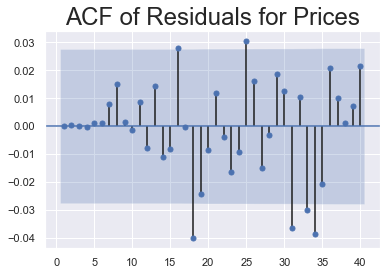

In [98]:
sgt.plot_acf(df.res_price, zero = False, lags = 40)
plt.title("ACF of Residuals for Prices", size = 24)
plt.show()

In [99]:
# majority of coefficiants are not significant (which matches the characteristic of White Noise)

In [100]:
# however, there are some points that fall out of the blue area, which can mean that there is an even better predictor

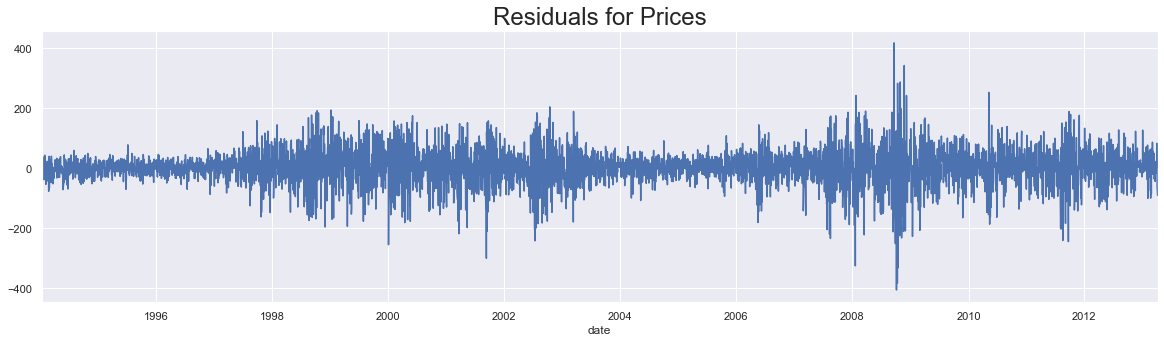

In [101]:
df.res_price[1:].plot(figsize = (20,5))
plt.title("Residuals for Prices", size = 24)
plt.show()

Analysing the Residuals

In [102]:
df['res_ret'] = results_ret_ar_6.resid

In [103]:
df.res_ret.mean()

-5.371918118491896e-05

In [104]:
df.res_ret.var()

1.3559802110685009

In [105]:
# mean close to 0 and low variance means that our choice of model was pretty good :)

In [106]:
sts.adfuller(df.res_ret)

(-70.78379722942753,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 15692.570834112306)

In [107]:
# stationary

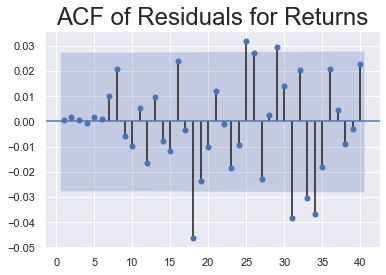

In [108]:
sgt.plot_acf(df.res_ret, zero = False, lags = 40)
plt.title("ACF of Residuals for Returns", size = 24)
plt.show()

In [109]:
# very similar scenario to ACF of Res for Prices

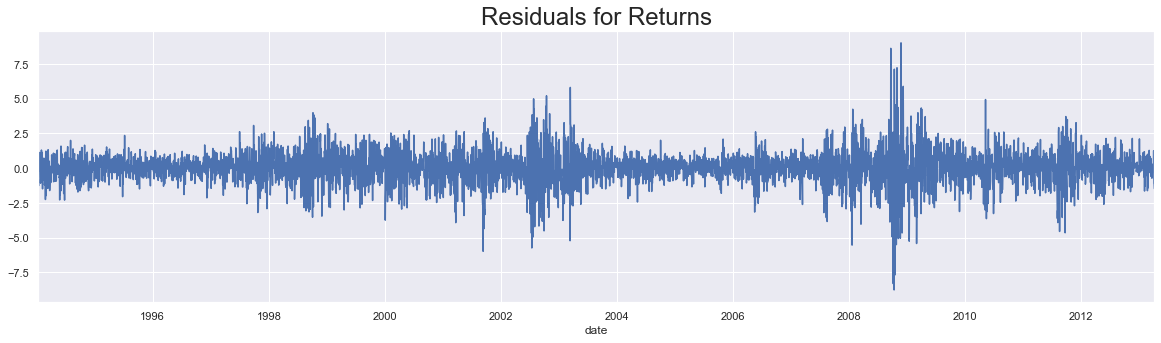

In [110]:
df.res_ret[1:].plot(figsize = (20,5))
plt.title("Residuals for Returns", size = 24)
plt.show()